# IRIS Flower Classification
Using the given Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements.

## Firstly Importing all the required Libraries and Dataset, required for the Model.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [4]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.shape

(150, 5)

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [13]:
data=df.groupby('species')

In [14]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [15]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# visualizing the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x7d92aedf3730>,
 'caps': [<matplotlib.lines.Line2D at 0x7d92aedf3c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d92aedf35b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d92aee281f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d92aee28490>],
 'means': []}

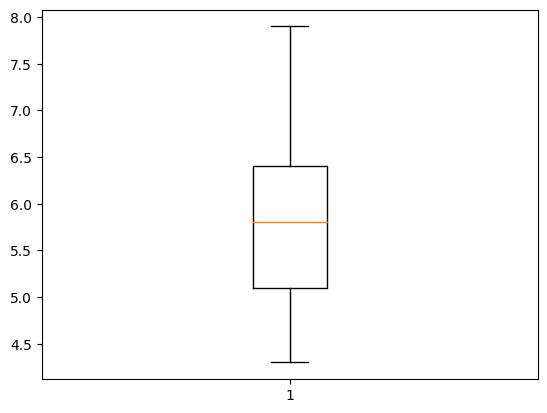

In [19]:
plt.boxplot(df['sepal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d92aee85fc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d92aee86500>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d92aee85d20>],
 'medians': [<matplotlib.lines.Line2D at 0x7d92aee86a40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d92aee86ce0>],
 'means': []}

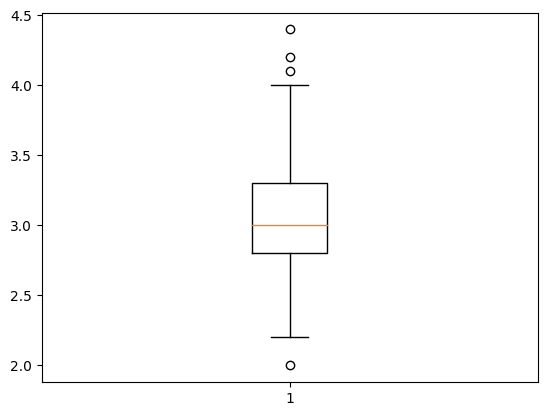

In [20]:
plt.boxplot(df['sepal_width'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d92aece3d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7d92aed14280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d92aece3a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7d92aed147c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d92aed14a60>],
 'means': []}

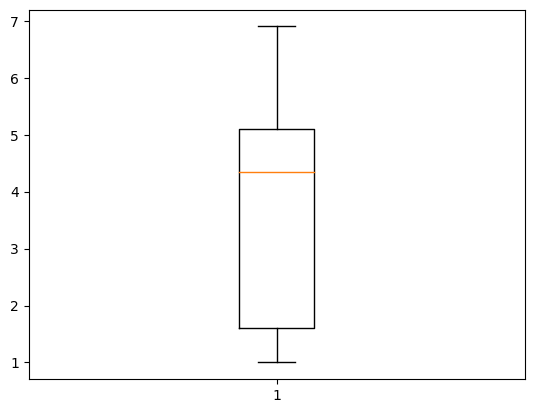

In [21]:
plt.boxplot(df['petal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d92aed719c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d92aed71f00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d92aed71720>],
 'medians': [<matplotlib.lines.Line2D at 0x7d92aed72440>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d92aed726e0>],
 'means': []}

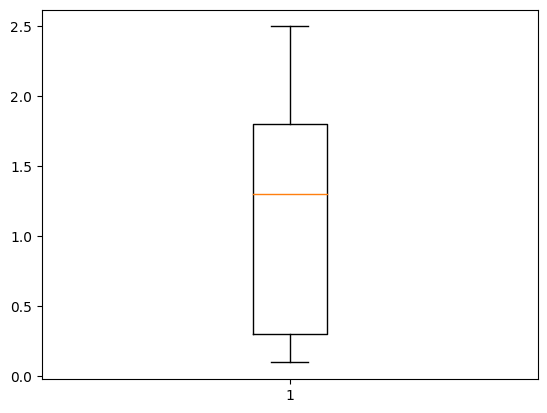

In [22]:
plt.boxplot(df['petal_width'])

<ipython-input-23-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

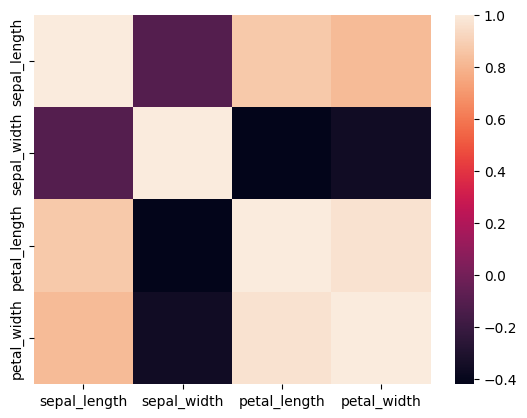

In [23]:
sns.heatmap(df.corr())


## Data Preparation

In [26]:
df.reset_index(drop=True, inplace=True)

In [28]:
sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

In [31]:
df.species=[sp[i] for i in df.species]

In [32]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [33]:
X=df.iloc[:,0:4]

In [34]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y=df.iloc[:,4]

In [36]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

## ~ Now Traning the Model

In [41]:
model=LinearRegression()

In [42]:
model.fit(X,y)

LinearRegression()

In [43]:
model.score(X,y) #coef of prediction

0.9304223675331595

In [44]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [45]:
model.intercept_

1.192083994828139

## Making the Pridiction

In [46]:
y_pred=model.predict(X_test)

## Now Evaluating the Model

In [47]:
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))

Mean squared error: 0.04
